In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords','punkt','wordnet','omw-1.4','vader_lexicon'])
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Sentiment Analysis


In [5]:
reviews = pd.read_csv('tourist_reviews.csv')
reviews.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn580924528,Reviewed 3 days ago,Kata Beach,The Tavern,John and the girls make this bar the type of b...
1,rn580696128,Reviewed 4 days ago,Kata Beach,The Tavern,I recently had the pleasure of attending at Th...
2,rn579766211,Reviewed 1 week ago,Kata Beach,The Tavern,We have been to Kata a number of times and hav...
3,rn579637841,Reviewed 1 week ago,Kata Beach,The Tavern,Sometimes you can revisit a place and it has c...
4,rn579633253,Reviewed 1 week ago,Kata Beach,The Tavern,Absolutely brilliant pub that does amazing foo...


In [6]:
reviews.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,2968,2968,2968,2968,2968
unique,2888,1075,2,30,2888
top,rn557927633,Reviewed 1 week ago,Kata Beach,The Tavern,This place is not really recommanded for good ...
freq,3,60,2675,100,3


In [7]:
reviews.isnull().sum().sort_values(ascending=False).head

<bound method NDFrame.head of ID                       0
Review Date              0
Location                 0
Hotel/Restaurant name    0
Review                   0
dtype: int64>

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()


In [ ]:
reviews['compound'] = [sentiment.polarity_scores(review)['compound'] for review in reviews['Review']]
reviews['neg'] = [sentiment.polarity_scores(review)['neg'] for review in reviews['Review']]
reviews['neu'] = [sentiment.polarity_scores(review)['neu'] for review in reviews['Review']]
reviews['pos'] = [sentiment.polarity_scores(review)['pos'] for review in reviews['Review']]

In [ ]:
reviews.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos
0,rn580924528,Reviewed 3 days ago,Kata Beach,The Tavern,John and the girls make this bar the type of b...,0.9062,0.000,0.769,0.231
1,rn580696128,Reviewed 4 days ago,Kata Beach,The Tavern,I recently had the pleasure of attending at Th...,0.9268,0.026,0.693,0.280
2,rn579766211,Reviewed 1 week ago,Kata Beach,The Tavern,We have been to Kata a number of times and hav...,0.9181,0.000,0.731,0.269
3,rn579637841,Reviewed 1 week ago,Kata Beach,The Tavern,Sometimes you can revisit a place and it has c...,0.8807,0.000,0.797,0.203
4,rn579633253,Reviewed 1 week ago,Kata Beach,The Tavern,Absolutely brilliant pub that does amazing foo...,0.9815,0.000,0.418,0.582


In [ ]:
reviews[['compound', 'neg', 'neu', 'pos']].describe()

,compound,neg,neu,pos
count,2968.000000,2968.000000,2968.000000,2968.000000
mean,0.658866,0.027312,0.734085,0.238606
std,0.426695,0.050937,0.128209,0.137942
min,-0.947200,0.000000,0.252000,0.000000
25%,0.571900,0.000000,0.646000,0.133750
50%,0.848100,0.000000,0.743000,0.229000
75%,0.929625,0.044000,0.830000,0.334250
max,0.989800,0.452000,1.000000,0.748000


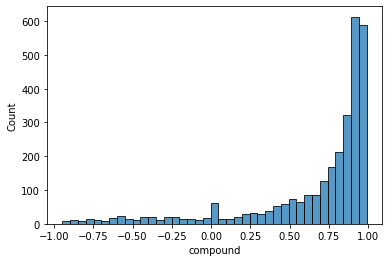

In [ ]:
sns.histplot(reviews['compound'])

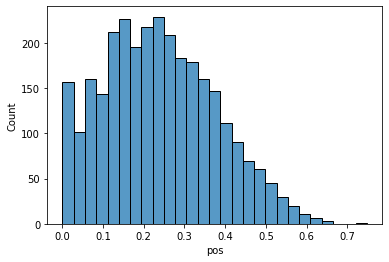

In [ ]:
sns.histplot(reviews['pos'])

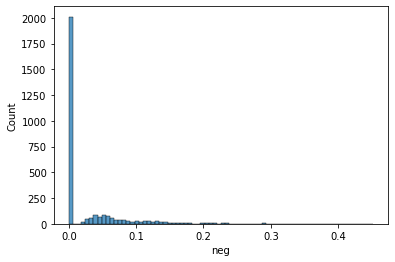

In [ ]:
sns.histplot(reviews['neg'])

In [ ]:
#neutral reviews per Hotel/Restaurant name
((reviews['compound']<=0.05) & (reviews['compound']>=-0.05)).groupby(reviews['Hotel/Restaurant name']).sum()

Hotel/Restaurant name
After Beach Bar                                           3
Autogrill Risto Bar Pizza                                 3
Burger House Kata Beach                                   1
Eightfold Restaurant                                      0
En Vogue Restaurant                                       3
Horn Grill Steak and Seafood                              3
Istanbul Turkish Restaurant                               3
Kata B-B-Q                                                5
Kata On Fire Bar and Grill                                1
Lobster & Prawn Restaurant                                8
Mali Seafood Restaurant & Bar                             5
Mom Tri's Kitchen at Villa Royale                         1
Outdoor Restaurant                                        3
Palm Square                                               2
Pomodoro Pizza Restaurant                                 3
Portofino Ristrorante &Pizzeria                           2
Red Chair Restaura

In [ ]:
#negative reviews per Hotel/Restaurant name
(reviews['compound']<=0).groupby(reviews['Hotel/Restaurant name']).sum()

Hotel/Restaurant name
After Beach Bar                                           18
Autogrill Risto Bar Pizza                                 10
Burger House Kata Beach                                    6
Eightfold Restaurant                                       5
En Vogue Restaurant                                        7
Horn Grill Steak and Seafood                              11
Istanbul Turkish Restaurant                                8
Kata B-B-Q                                                22
Kata On Fire Bar and Grill                                 8
Lobster & Prawn Restaurant                                16
Mali Seafood Restaurant & Bar                             26
Mom Tri's Kitchen at Villa Royale                          5
Outdoor Restaurant                                        21
Palm Square                                                4
Pomodoro Pizza Restaurant                                 10
Portofino Ristrorante &Pizzeria                           14
Re

In [ ]:
#calculate as percentage of total reviews

percent_negative = pd.DataFrame((reviews['compound']<=0).groupby(reviews['Hotel/Restaurant name']).sum()
/reviews['Hotel/Restaurant name'].groupby(reviews['Hotel/Restaurant name']).count()*100, 
columns =['% negative reviews']).sort_values(by='% negative reviews').tail(10)

percent_negative

,% negative reviews
Hotel/Restaurant name,
Tiger Bar,14.000000
Portofino Ristrorante &Pizzeria,14.432990
Lobster & Prawn Restaurant,17.391304
After Beach Bar,18.000000
Red Snapper,21.000000
Kata B-B-Q,22.000000
Outdoor Restaurant,22.580645
Sorrento pizzeria,24.000000
Mali Seafood Restaurant & Bar,26.804124


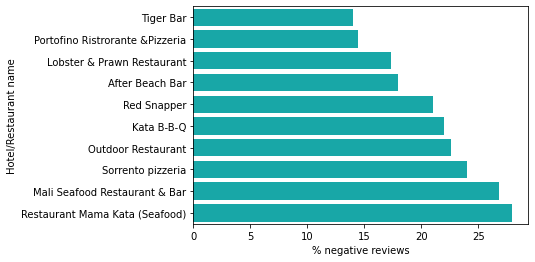

In [ ]:
sns.barplot(data=percent_negative, x = '% negative reviews', y= percent_negative.index, color = 'c')

In [ ]:
stop_words = nltk.corpus.stopwords.words('english')
stop_words.extend(['restaurant', 'went', 'visit', 'mama', 'kata', 'day', 'came','ordered', 'beach'])


In [ ]:
def preprocess_text(text):
  tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text) #tokemize
  cleaned_tokens =[word.lower() for word in tokenized_document if word.lower() not in stop_words] #remove
  lemmatized_text = [nltk.stem.WordNetLemmatizer().lemmatize(word) for word in cleaned_tokens] #lemmatization
  return lemmatized_text

In [ ]:
#Process the text data ready for worldcloud visualisation 
# for this part of the report we focus on Restaurant Mama Kata (Seafood)

reviews['processed_review'] = reviews['Review'].apply(preprocess_text)
reviews_positive_subset = reviews.loc[(reviews['Hotel/Restaurant name']=='Restaurant Mama Kata (Seafood)')& (reviews['compound']>0),:]
reviews_negative_subset = reviews.loc[(reviews['Hotel/Restaurant name']=='Restaurant Mama Kata (Seafood)')& (reviews['compound']<=0),:]
reviews_neutral_subsett = reviews.loc[(reviews['Hotel/Restaurant name']=='Restaurant Mama Kata (Seafood)')& ((reviews['compound']<=0.05) & (reviews['compound']>=-0.05)),:]
reviews_positive_subset.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos,processed_review
2478,rn579801372,Reviewed 1 week ago,Kata Beach,Restaurant Mama Kata (Seafood),I didn't think with all the seafood places her...,0.5464,0.095,0.759,0.146,"[think, seafood, place, sushi, would, hard, fi..."
2479,rn579763977,Reviewed 1 week ago,Kata Beach,Restaurant Mama Kata (Seafood),Lovely place to sit and take in the view. Grea...,0.9325,0.000,0.622,0.378,"[lovely, place, sit, take, view, great, servic..."
2480,rn579674866,Reviewed 1 week ago,Kata Beach,Restaurant Mama Kata (Seafood),"Right on the beach, beautiful outdoor seating,...",0.6360,0.042,0.788,0.170,"[right, beautiful, outdoor, seating, amazing, ..."
2481,rn576756236,Reviewed 2 weeks ago,Kata Beach,Restaurant Mama Kata (Seafood),We sheltered from the deluge and decided to ha...,0.1280,0.039,0.911,0.050,"[sheltered, deluge, decided, coffee, looked, m..."
2482,rn571666117,"Reviewed April 7, 2018",Kata Beach,Restaurant Mama Kata (Seafood),7 of us popped in here in evening and we enjoy...,0.8588,0.000,0.808,0.192,"[7, u, popped, evening, enjoyed, night, drink,..."


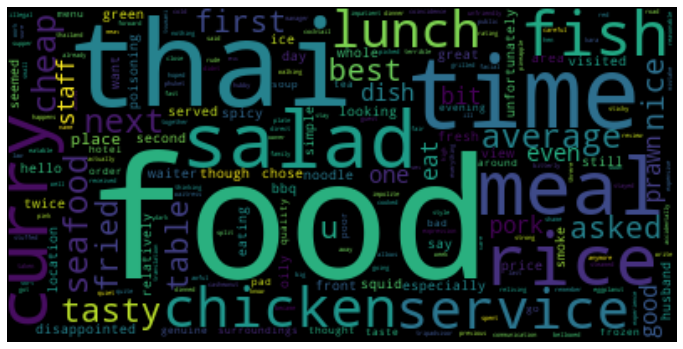

In [ ]:
#Worldcloud of words from negative reviews by hotel

neg_tokens = [word for review in reviews_negative_subset['processed_review'] for word in review]
wordcloud = WordCloud(background_color='black').generate_from_text(
    ' '.join(neg_tokens))

#Display image
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

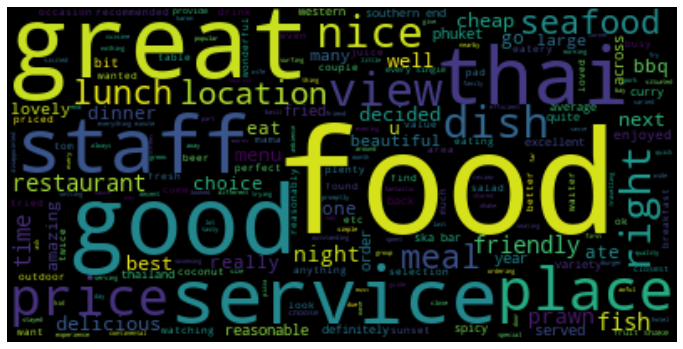

In [ ]:
#Worldcloud of words from positive reviews by hotel

pos_tokens = [word for review in reviews_positive_subset['processed_review'] for word in review]
wordcloud = WordCloud(background_color='black').generate_from_text(' '.join(pos_tokens))

#Display image
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#using nltk freqdist and tabulate
from nltk.probability import FreqDist
pos_freqdist = FreqDist(pos_tokens)

pos_freqdist.tabulate(10)

   food   great    good    thai service   staff   place   price    view    dish 
     48      33      29      21      20      20      18      18      14      12 


In [ ]:
#using nltk freqdist and tabulate
from nltk.probability import FreqDist
neg_freqdist = FreqDist(neg_tokens)

neg_freqdist.tabulate(10)

   food    thai    time   salad    meal   curry    rice    fish service chicken 
     21       9       6       6       6       5       5       5       4       4 


In [ ]:
#using nltk freqdist and tabulate
neu_tokens = [word for review in reviews_neutral_subsett['processed_review'] for word in review]

from nltk.probability import FreqDist
neu_freqdist = FreqDist(neu_tokens)

neu_freqdist.tabulate(10)

   food   curry    thai   green chicken   spicy   salad    fish     ice     tea 
      4       3       3       2       2       2       2       2       2       2 
